**Disciplina:** SCC5948_Ciência_de_dados

**Normando de Campos Amazonas Filho**

**NUSP:** 11561949

## Dados multidimensionais

#### 1. Importe as bibliotecas Numpy e Pandas e carregue o conjunto de dados Iris



In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={"figure.figsize": (20, 10)})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Carregando base de dados
df = pd.read_csv("/content/drive/MyDrive/Mestrado/Discipinas/Exercícios - Ciência de Dados/data/iris.data", sep=",", header=None)

In [ ]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### [Sobre o Iris ](https://pt.wikipedia.org/wiki/Conjunto_de_dados_flor_Iris)
O conjunto de dados consiste em amostras de três espécies de flores Iris ( Iris setosa, Iris virginica e Iris versicolor). Quatro atributos foram medidos em cada amostra: o comprimento e a largura das sépalas e pétalas, em centímetros.

A estrutura das variáveis no arquivo é:

1. comprimento sépala em cm
2. largura sépala em cm
3. comprimento da pétala em cm
4. largura da pétala em cm
5. classe:
  - Iris Setosa
  - Iris Versicolour
  - Iris Virginica

#### 2. Coloque nomes nas colunas do DataFrame de acordo com a descrição acima

In [ ]:
def add_column_names(df):
  # seu código aqui
  df.columns = ["comprimento_sepala_cm", "largura_sepala_cm", "comprimento_petala_cm", "largura_petala_cm", "classe"]
  return df

In [ ]:
df = add_column_names(df)

In [ ]:
df.head()

,comprimento_sepala_cm,largura_sepala_cm,comprimento_petala_cm,largura_petala_cm,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### 3. Usando Pandas, gere um histograma dos valores para cada um dos atributos (colunas)



In [ ]:
def show_histograms(df):

  fig, axes = plt.subplots(3, 2)

  i = 0

  for line_ax in axes:
    for column_ax in line_ax:
      df[df.columns[i]].hist(ax=column_ax)
      column_ax.set_title(df.columns[i])
      i+=1
      if i == 5: break

  fig.delaxes(axes[2,1])


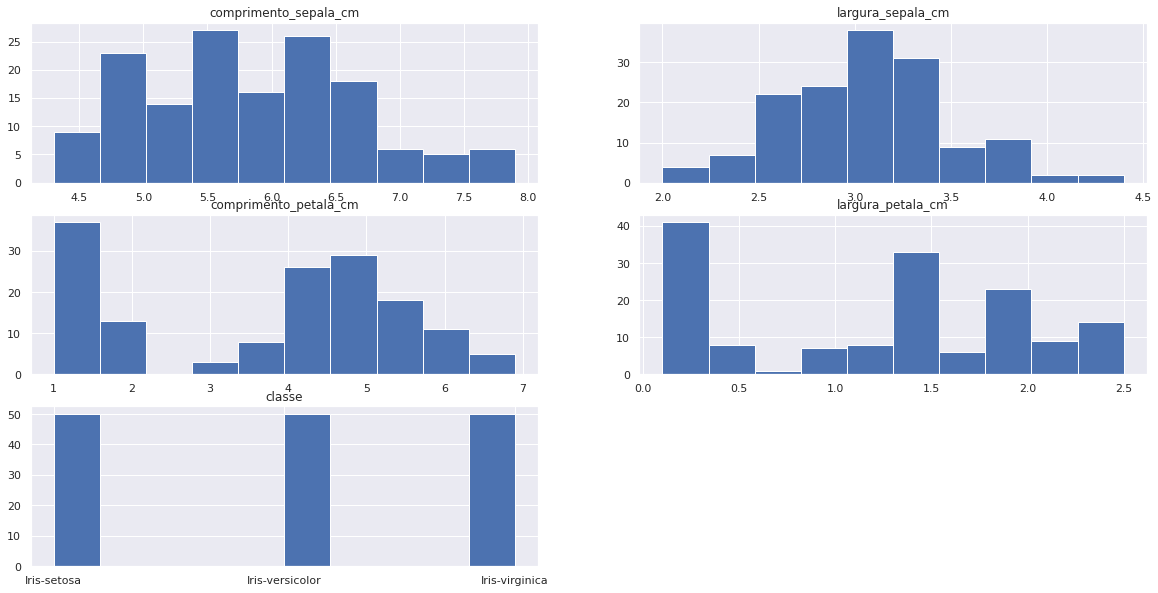

In [ ]:
show_histograms(df)

#### 4. Mostre o histograma para cada classe de um atributo (recebido por parâmetro)

---





In [ ]:
def show_histogram_per_class(df, attr_name):

  fig, axes = plt.subplots(3)

  for ax, cl in zip(axes, df["classe"].unique()):
    filtered_df = df[df["classe"] == cl]
    filtered_df[attr_name].hist(ax=ax)
    ax.set_title(cl)


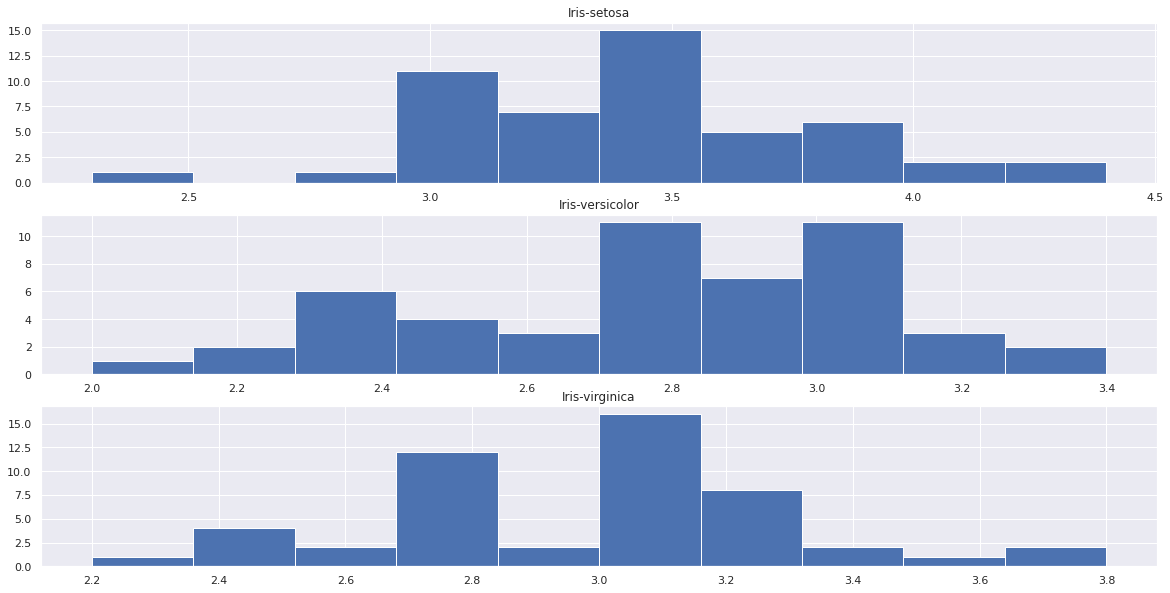

In [ ]:
show_histogram_per_class(df, "largura_sepala_cm")

#### 5. Todas as medições foram feitas em cm. crie uma nova coluna para cada atributo com seus valores em milímetros

In [ ]:
def add_mm_cols(df):
  # seu código aqui
  for column in df.columns:
    if column == "classe": continue

    df[column.replace("cm", "mm")] = df[column] * 10

  return df

In [ ]:
df = add_mm_cols(df)

In [ ]:
df.head()

,comprimento_sepala_cm,largura_sepala_cm,comprimento_petala_cm,largura_petala_cm,classe,comprimento_sepala_mm,largura_sepala_mm,comprimento_petala_mm,largura_petala_mm
0,5.1,3.5,1.4,0.2,Iris-setosa,51.0,35.0,14.0,2.0
1,4.9,3.0,1.4,0.2,Iris-setosa,49.0,30.0,14.0,2.0
2,4.7,3.2,1.3,0.2,Iris-setosa,47.0,32.0,13.0,2.0
3,4.6,3.1,1.5,0.2,Iris-setosa,46.0,31.0,15.0,2.0
4,5.0,3.6,1.4,0.2,Iris-setosa,50.0,36.0,14.0,2.0


#### 6. Conte o número de amostras por classe, retorne uma lista com 3 elementos com a contagem de cada classe

In [ ]:
def count_samples_per_class(df):

  return df["classe"].value_counts().values.tolist()

In [ ]:
count_samples_per_class(df)

[50, 50, 50]

#### 7. Dado um atributo, printe qual classe possui o maior e menor valor. Exemplo (não necessáriamente correto): "A classe Iris-Setosa possui a menor medição de largura de sépala."

In [ ]:
def min_max(df, attr_name):

  # seu código aqui
  min_df = df.groupby("classe").min().sort_values(by=attr_name)
  max_df = df.groupby("classe").max().sort_values(by=attr_name, ascending=False)

  min_class_name = min_df.index[0]
  max_class_name = max_df.index[0]

  print('A classe {} possui o menor {}'.format(min_class_name, attr_name))
  print('A classe {} possui o maior {}'.format(max_class_name, attr_name))

In [ ]:
df.groupby("classe").max().sort_values(by="largura_sepala_cm", ascending=False)

,comprimento_sepala_cm,largura_sepala_cm,comprimento_petala_cm,largura_petala_cm,comprimento_sepala_mm,largura_sepala_mm,comprimento_petala_mm,largura_petala_mm
classe,,,,,,,,
Iris-setosa,5.8,4.4,1.9,0.6,58.0,44.0,19.0,6.0
Iris-virginica,7.9,3.8,6.9,2.5,79.0,38.0,69.0,25.0
Iris-versicolor,7.0,3.4,5.1,1.8,70.0,34.0,51.0,18.0


In [ ]:
min_max(df, "largura_sepala_cm")

A classe Iris-versicolor possui o menor largura_sepala_cm
A classe Iris-setosa possui o maior largura_sepala_cm


In [ ]:
df["largura_sepala_cm"].describe()

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: largura_sepala_cm, dtype: float64